# 03 Insurance Draft

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier


import warnings
import shap
import optuna

## Display Features

In [4]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
warnings.filterwarnings("ignore")

## Colors

In [5]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [6]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Standards

Below is a summary of the standards I followed and my assumptions related to this project. 

>* **Standard 1:** My standard for an acceptable accuracy Score for wins is 75%. <BR>

# Load Data

In [7]:
insurance = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Insurance\\DataSet\\Insurance.csv",
    index_col=0,
)

In [8]:
insurance = insurance.rename(columns={'Employment Type':'EmploymentType', 'GraduateOrNot':'Graduate',
                   'EverTravelledAbroad':'TravelledAbroad'})

In [9]:
insurance.head()

,Age,EmploymentType,Graduate,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,TravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [10]:
insurance.shape[0]

1987

In [11]:
insurance.Age.sort_values().unique()

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35], dtype=int64)

In [12]:
insurance.EmploymentType.unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [13]:
insurance.Graduate.unique()

array(['Yes', 'No'], dtype=object)

In [14]:
sorted_unique = insurance.AnnualIncome.sort_values().unique()
sorted_unique 

array([ 300000,  350000,  400000,  450000,  500000,  550000,  600000,
        650000,  700000,  750000,  800000,  850000,  900000,  950000,
       1000000, 1050000, 1100000, 1150000, 1200000, 1250000, 1300000,
       1350000, 1400000, 1450000, 1500000, 1550000, 1650000, 1700000,
       1750000, 1800000], dtype=int64)

In [15]:
insurance.FamilyMembers.sort_values().unique()


array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [16]:
insurance.ChronicDiseases.unique()

array([1, 0], dtype=int64)

In [17]:
insurance.FrequentFlyer.unique()

array(['No', 'Yes'], dtype=object)

In [18]:
insurance.TravelledAbroad.unique()

array(['No', 'Yes'], dtype=object)

In [19]:
insurance.TravelInsurance.unique()

array([0, 1], dtype=int64)

In [20]:
insurance = insurance.replace(['Yes'], 1)

In [21]:
insurance.isnull().sum(axis=0)

Age                0
EmploymentType     0
Graduate           0
AnnualIncome       0
FamilyMembers      0
ChronicDiseases    0
FrequentFlyer      0
TravelledAbroad    0
TravelInsurance    0
dtype: int64

In [22]:
insurance.count()

Age                1987
EmploymentType     1987
Graduate           1987
AnnualIncome       1987
FamilyMembers      1987
ChronicDiseases    1987
FrequentFlyer      1987
TravelledAbroad    1987
TravelInsurance    1987
dtype: int64

In [23]:
insurance.dtypes

Age                 int64
EmploymentType     object
Graduate           object
AnnualIncome        int64
FamilyMembers       int64
ChronicDiseases     int64
FrequentFlyer      object
TravelledAbroad    object
TravelInsurance     int64
dtype: object

<Axes: xlabel='Age', ylabel='count'>

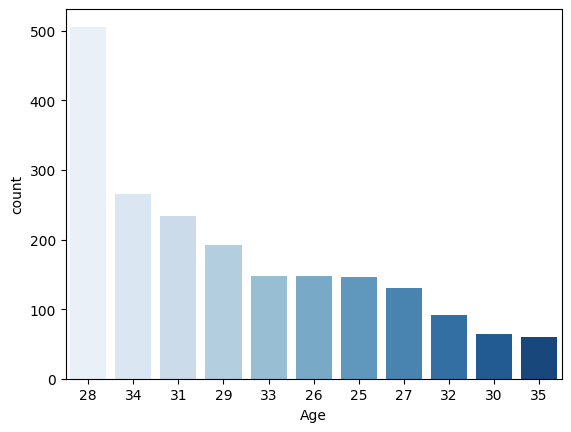

In [24]:
sns.countplot( x = 'Age', data = insurance, palette="Blues", order=insurance['Age'].value_counts().index)

In [ ]:
sns.countplot( x = 'EmploymentType', data = insurance, palette="Blues", order=insurance['EmploymentType'].value_counts().index)

In [ ]:
sns.countplot( x = 'Graduate', data = insurance, palette="Blues", order=insurance['Graduate'].value_counts().index)

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(y = 'AnnualIncome', data = insurance, palette="Blues")

In [ ]:
sns.countplot(x = 'FamilyMembers', data = insurance, palette="Blues")

In [ ]:
sns.countplot(x = 'ChronicDiseases', data = insurance, palette="Blues")

In [ ]:
sns.countplot(x = 'FrequentFlyer', data = insurance, palette="Blues")

In [ ]:

sns.countplot(x = 'TravelledAbroad', data = insurance, palette="Blues")

In [ ]:
sns.countplot(x = 'TravelInsurance', data = insurance, palette="Blues")

In [ ]:
sns.countplot(
    x="TravelInsurance",
    data=insurance,
    palette="Blues",
    order=insurance["TravelInsurance"].value_counts().index,
)

In [ ]:
def create_heatmap(data, title):
    """
    Creates a Seaborn heatmap.
    """

    plt.rcParams.update(params)
    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(10, 15))

    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    heatmap = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
    )

    heatmap.set_title(
        title,
        fontdict={"fontsize": size},
        pad=12,
    )
    plt.xlabel("")
    plt.ylabel("")

In [ ]:
data = insurance
title = "Correlation of Features in the Travel Insurance Database"
create_heatmap(data, title)

In [ ]:
corr_matrix = insurance.corr(numeric_only=True)
corr_matrix["TravelInsurance"].sort_values(ascending=False)

# Logistic Regression

In [25]:
label_encoder = LabelEncoder()
obj = (insurance.dtypes == 'object')

for col in list(obj[obj].index):
    insurance[col] = label_encoder.fit_transform(insurance[col])

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['int', 'str']

In [ ]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"] 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

In [ ]:
y_predict = logisticregression.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
plot_confusion_matrix(logisticregression,X_test,y_test, cmap=plt.cm.Blues)
plt.xticks([0,1],['Yes', 'No'])
plt.yticks([0,1], ['Yes', 'No']);

# Decision Tree

In [103]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [104]:
y_predict = decisiontree.predict(X_test)

In [105]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       258
           1       0.72      0.58      0.64       140

    accuracy                           0.77       398
   macro avg       0.76      0.73      0.74       398
weighted avg       0.77      0.77      0.77       398



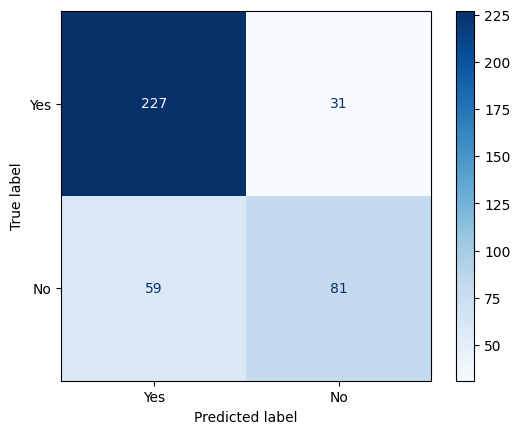

In [106]:
plot_confusion_matrix(decisiontree,X_test,y_test, cmap=plt.cm.Blues)
plt.xticks([0,1],['Yes', 'No'])
plt.yticks([0,1], ['Yes', 'No']);

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [ ]:
y_predict = decisiontree.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
plot_confusion_matrix(knn,X_test,y_test, cmap=plt.cm.Blues)
plt.xticks([0,1],['Yes', 'No'])
plt.yticks([0,1], ['Yes', 'No']);

# SHAP

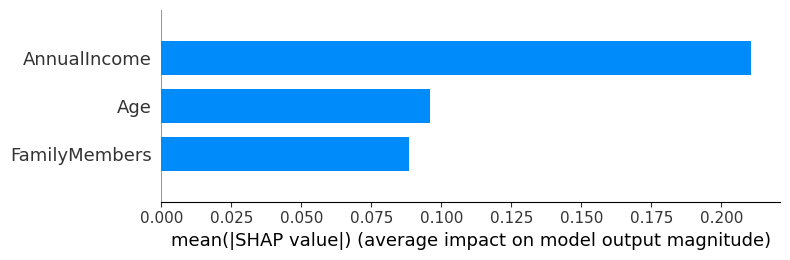

In [116]:
# Initialize the explainer with the training data
explainer = shap.TreeExplainer(decisiontree)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0], X_test, plot_type="bar")
plt.show()

# Important Features

In [175]:
X = insurance [["AnnualIncome", "Age", "FamilyMembers"]]

# Logistic Regression with SHAP

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [177]:
logisticregression = LogisticRegression()
logisticregression.fit(X_train, y_train)

LogisticRegression()

In [178]:
y_predict = logisticregression.predict(X_test)

In [179]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       258
           1       0.00      0.00      0.00       140

    accuracy                           0.65       398
   macro avg       0.32      0.50      0.39       398
weighted avg       0.42      0.65      0.51       398



# Decision Tree with SHAP

In [180]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

In [181]:
y_predict = decisiontree.predict(X_test)

In [182]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       258
           1       0.73      0.59      0.65       140

    accuracy                           0.78       398
   macro avg       0.76      0.73      0.74       398
weighted avg       0.77      0.78      0.77       398



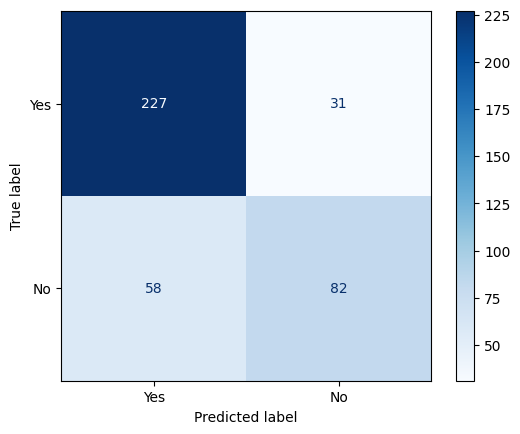

In [183]:
plot_confusion_matrix(decisiontree,X_test,y_test, cmap=plt.cm.Blues)
plt.xticks([0,1],['Yes', 'No'])
plt.yticks([0,1], ['Yes', 'No']);

# KNN with SHAP

In [184]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [185]:
y_predict = decisiontree.predict(X_test)

In [186]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       258
           1       0.73      0.59      0.65       140

    accuracy                           0.78       398
   macro avg       0.76      0.73      0.74       398
weighted avg       0.77      0.78      0.77       398



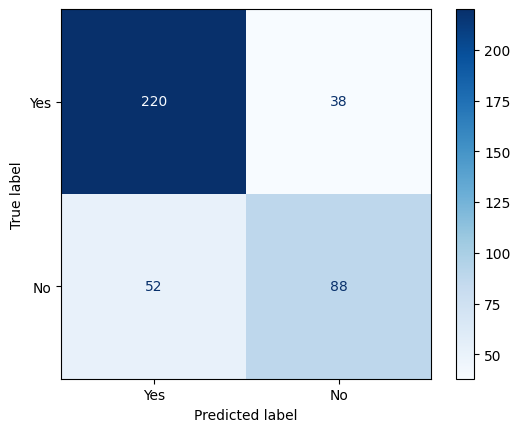

In [187]:
plot_confusion_matrix(knn,X_test,y_test, cmap=plt.cm.Blues)
plt.xticks([0,1],['Yes', 'No'])
plt.yticks([0,1], ['Yes', 'No']);

# Logistic Regression with Optuna

In [188]:
def objective(trial):
    # Define the hyperparameters to optimize
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    max_iter = trial.suggest_int('max_iter', 10, 20)

    # Train a logistic regression model with the current hyperparameters
    model = LogisticRegression(C=C,
                               max_iter=max_iter,
                               random_state=0)
    
    model.fit(X_train, y_train)

    # Calculate the accuracy score for the model on the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Report the accuracy score to Optuna
    return accuracy

In [189]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print(f"Best AUC score: {study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

# Train the final logistic regression model with the best hyperparameters
best_params = study.best_params
model = LogisticRegression(C=best_params['C'],
                           max_iter=best_params['max_iter'],
                           random_state=0)
model.fit(X_train, y_train)

[I 2023-05-07 14:46:30,424] A new study created in memory with name: no-name-cbcb197d-d38c-4c98-afa9-b9d6b379828f
[I 2023-05-07 14:46:30,440] Trial 0 finished with value: 0.6482412060301508 and parameters: {'C': 33409.53044679378, 'max_iter': 11}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:30,455] Trial 1 finished with value: 0.6482412060301508 and parameters: {'C': 571.2578731735998, 'max_iter': 11}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:30,455] Trial 2 finished with value: 0.6482412060301508 and parameters: {'C': 2.1316604258484575e-05, 'max_iter': 15}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:30,471] Trial 3 finished with value: 0.6482412060301508 and parameters: {'C': 32.37047378252708, 'max_iter': 15}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:30,487] Trial 4 finished with value: 0.6482412060301508 and parameters: {'C': 0.06754557654259027, 'max_iter': 18}. Best is trial 0 w

[I 2023-05-07 14:46:31,637] Trial 41 finished with value: 0.6482412060301508 and parameters: {'C': 375.1858150618616, 'max_iter': 19}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:31,669] Trial 42 finished with value: 0.6482412060301508 and parameters: {'C': 47.29626916027055, 'max_iter': 15}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:31,700] Trial 43 finished with value: 0.6482412060301508 and parameters: {'C': 79984.89690324772, 'max_iter': 17}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:31,731] Trial 44 finished with value: 0.6482412060301508 and parameters: {'C': 22656.583153927742, 'max_iter': 16}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:31,762] Trial 45 finished with value: 0.6482412060301508 and parameters: {'C': 3991.6367142959593, 'max_iter': 18}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:31,794] Trial 46 finished with value: 0.6482412060301508 and pa

[I 2023-05-07 14:46:32,850] Trial 83 finished with value: 0.6482412060301508 and parameters: {'C': 10.016866734709309, 'max_iter': 12}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:32,866] Trial 84 finished with value: 0.6482412060301508 and parameters: {'C': 2908.205966746904, 'max_iter': 14}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:32,897] Trial 85 finished with value: 0.6482412060301508 and parameters: {'C': 59.46933688336841, 'max_iter': 13}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:32,913] Trial 86 finished with value: 0.6482412060301508 and parameters: {'C': 986.8753735097499, 'max_iter': 12}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:32,944] Trial 87 finished with value: 0.6482412060301508 and parameters: {'C': 287.84040245419567, 'max_iter': 11}. Best is trial 0 with value: 0.6482412060301508.
[I 2023-05-07 14:46:32,975] Trial 88 finished with value: 0.6482412060301508 and pa

Best AUC score: 0.64824
Best hyperparameters:
	C: 33409.53044679378
	max_iter: 11


LogisticRegression(C=33409.53044679378, max_iter=11, random_state=0)

In [190]:
print(f"Best accuracy score: {study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

Best accuracy score: 0.64824
Best hyperparameters:
	C: 33409.53044679378
	max_iter: 11


In [142]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print(f"Best AUC score: {study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

# Train the final logistic regression model with the best hyperparameters
best_params = study.best_params

[I 2023-05-07 14:20:41,459] A new study created in memory with name: no-name-46438eb8-6b5b-41e9-ae53-05a73abe7dc5
[I 2023-05-07 14:20:41,479] Trial 0 finished with value: 0.2656284606866002 and parameters: {'C': 0.21022382251398494, 'max_iter': 20}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:41,490] Trial 1 finished with value: 0.2656284606866002 and parameters: {'C': 1.3252875552605867, 'max_iter': 10}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:41,511] Trial 2 finished with value: 0.2656284606866002 and parameters: {'C': 0.0004057674071234978, 'max_iter': 11}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:41,527] Trial 3 finished with value: 0.2656284606866002 and parameters: {'C': 97869.32728225668, 'max_iter': 15}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:41,552] Trial 4 finished with value: 0.2656284606866002 and parameters: {'C': 4.3741210824792, 'max_iter': 15}. Best is trial 0 wit

[I 2023-05-07 14:20:42,616] Trial 41 finished with value: 0.2656284606866002 and parameters: {'C': 47.7529185114831, 'max_iter': 15}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:42,647] Trial 42 finished with value: 0.2656284606866002 and parameters: {'C': 160.64230135691253, 'max_iter': 14}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:42,677] Trial 43 finished with value: 0.2656284606866002 and parameters: {'C': 3.3716016886405793, 'max_iter': 13}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:42,717] Trial 44 finished with value: 0.2656284606866002 and parameters: {'C': 0.6324309987752467, 'max_iter': 15}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:42,758] Trial 45 finished with value: 0.2656284606866002 and parameters: {'C': 25.133603668618903, 'max_iter': 20}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:42,791] Trial 46 finished with value: 0.2656284606866002 and p

[I 2023-05-07 14:20:44,083] Trial 83 finished with value: 0.2656284606866002 and parameters: {'C': 21.045584619542574, 'max_iter': 20}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:44,108] Trial 84 finished with value: 0.2656284606866002 and parameters: {'C': 46.84755691456642, 'max_iter': 20}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:44,141] Trial 85 finished with value: 0.2656284606866002 and parameters: {'C': 4.449829773570155, 'max_iter': 18}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:44,182] Trial 86 finished with value: 0.2656284606866002 and parameters: {'C': 16.648945564758634, 'max_iter': 19}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:44,224] Trial 87 finished with value: 0.2656284606866002 and parameters: {'C': 983.2066748290381, 'max_iter': 17}. Best is trial 0 with value: 0.2656284606866002.
[I 2023-05-07 14:20:44,258] Trial 88 finished with value: 0.2656284606866002 and pa

Best AUC score: 0.26563
Best hyperparameters:
	C: 0.21022382251398494
	max_iter: 20


In [143]:
model = LogisticRegression(C=best_params['C'],
                           max_iter=best_params['max_iter'],
                           random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=0.21022382251398494, max_iter=20, random_state=0)

In [144]:
y_predict = model.predict(X_test)

In [145]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       258
           1       0.00      0.00      0.00       140

    accuracy                           0.65       398
   macro avg       0.32      0.50      0.39       398
weighted avg       0.42      0.65      0.51       398



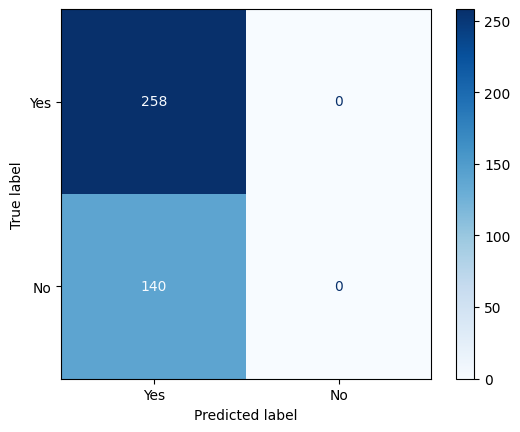

In [146]:
plot_confusion_matrix(model,X_test,y_test, cmap=plt.cm.Blues)
plt.xticks([0,1],['Yes', 'No'])
plt.yticks([0,1], ['Yes', 'No']);

# Decision Tree with Optuna

In [191]:
def objective(trial):

    # Define the hyperparameters to optimize
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    
    # Train a decision tree model with the current hyperparameters
    model = DecisionTreeClassifier(criterion=criterion,
                                    splitter=splitter,
                                    max_depth=max_depth,
                                    min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=0)
    model.fit(X_train, y_train)

    
    # Calculate the accuracy score for the model on the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Report the accuracy score to Optuna
    return accuracy

In [192]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10);

[I 2023-05-07 14:48:32,696] A new study created in memory with name: no-name-280b2c0e-bac5-421d-9203-51e1ee471b9e
[I 2023-05-07 14:48:32,711] Trial 0 finished with value: 0.8241206030150754 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8241206030150754.
[I 2023-05-07 14:48:32,727] Trial 1 finished with value: 0.7839195979899497 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.8241206030150754.
[I 2023-05-07 14:48:32,743] Trial 2 finished with value: 0.8241206030150754 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 21, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8241206030150754.
[I 2023-05-07 14:48:32,743] Trial 3 finished with value: 0.7864321608040201 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth

In [193]:
import optuna
print(optuna.__version__)

3.1.1


In [194]:
print(f"Best AUC score: {study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

Best AUC score: 0.82412
Best hyperparameters:
	criterion: gini
	splitter: best
	max_depth: 3
	min_samples_split: 4
	min_samples_leaf: 10


In [195]:
best_params = study.best_params

In [196]:
best_params

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 3,
 'min_samples_split': 4,
 'min_samples_leaf': 10}

In [197]:
best_params = study.best_params

model = DecisionTreeClassifier(criterion=best_params['criterion'],
                                splitter=best_params['splitter'],
                                max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=4,
                       random_state=0)

In [198]:
y_predict = model.predict(X_test)

In [199]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       258
           1       0.93      0.54      0.68       140

    accuracy                           0.82       398
   macro avg       0.86      0.76      0.78       398
weighted avg       0.84      0.82      0.81       398



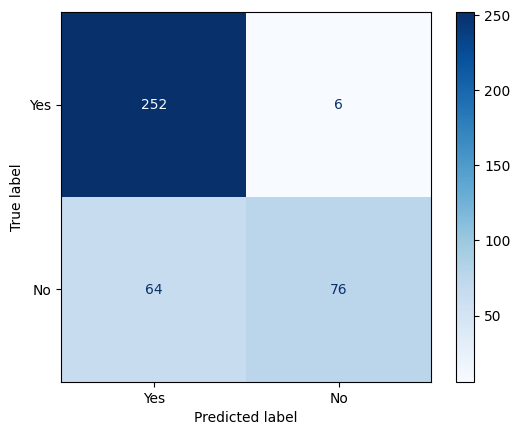

In [200]:
plot_confusion_matrix(model,X_test,y_test, cmap=plt.cm.Blues)
plt.xticks([0,1],['Yes', 'No'])
plt.yticks([0,1], ['Yes', 'No']);

# Optuna with KNN

In [162]:
from sklearn.metrics import accuracy_score

def objective(trial):
    # Define the hyperparameters to optimize
    n_neighbors = trial.suggest_int('n_neighbors', 3, 20)
    p = trial.suggest_int('p', 1, 2)

    # Train a KNN classifier with the current hyperparameters
    model = KNeighborsClassifier(n_neighbors=n_neighbors,
                                  p=p)
    model.fit(X_train, y_train)

    # Calculate the accuracy score for the model on the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Report the accuracy score to Optuna
    return accuracy


[I 2023-05-07 14:28:27,057] A new study created in memory with name: no-name-706bb35b-4424-4582-be15-dfc2d3f4ff5a
[I 2023-05-07 14:28:27,079] Trial 0 finished with value: 0.8090452261306532 and parameters: {'n_neighbors': 7, 'p': 1}. Best is trial 0 with value: 0.8090452261306532.
[I 2023-05-07 14:28:27,095] Trial 1 finished with value: 0.8140703517587939 and parameters: {'n_neighbors': 9, 'p': 2}. Best is trial 1 with value: 0.8140703517587939.
[I 2023-05-07 14:28:27,142] Trial 2 finished with value: 0.821608040201005 and parameters: {'n_neighbors': 14, 'p': 1}. Best is trial 2 with value: 0.821608040201005.
[I 2023-05-07 14:28:27,164] Trial 3 finished with value: 0.8115577889447236 and parameters: {'n_neighbors': 20, 'p': 1}. Best is trial 2 with value: 0.821608040201005.
[I 2023-05-07 14:28:27,179] Trial 4 finished with value: 0.8115577889447236 and parameters: {'n_neighbors': 5, 'p': 2}. Best is trial 2 with value: 0.821608040201005.
[I 2023-05-07 14:28:27,211] Trial 5 finished wit

[I 2023-05-07 14:28:28,667] Trial 45 finished with value: 0.821608040201005 and parameters: {'n_neighbors': 10, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:28,714] Trial 46 finished with value: 0.8115577889447236 and parameters: {'n_neighbors': 5, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:28,746] Trial 47 finished with value: 0.8090452261306532 and parameters: {'n_neighbors': 7, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:28,783] Trial 48 finished with value: 0.8115577889447236 and parameters: {'n_neighbors': 5, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:28,830] Trial 49 finished with value: 0.8090452261306532 and parameters: {'n_neighbors': 7, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:28,868] Trial 50 finished with value: 0.8040201005025126 and parameters: {'n_neighbors': 4, 'p': 1}. Best is trial 28 with value: 

[I 2023-05-07 14:28:30,419] Trial 90 finished with value: 0.8291457286432161 and parameters: {'n_neighbors': 8, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:30,466] Trial 91 finished with value: 0.8291457286432161 and parameters: {'n_neighbors': 8, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:30,503] Trial 92 finished with value: 0.8090452261306532 and parameters: {'n_neighbors': 7, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:30,535] Trial 93 finished with value: 0.8090452261306532 and parameters: {'n_neighbors': 9, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:30,572] Trial 94 finished with value: 0.8090452261306532 and parameters: {'n_neighbors': 7, 'p': 1}. Best is trial 28 with value: 0.8291457286432161.
[I 2023-05-07 14:28:30,619] Trial 95 finished with value: 0.8291457286432161 and parameters: {'n_neighbors': 8, 'p': 1}. Best is trial 28 with value: 

Best accuracy score: 0.82915
Best hyperparameters:
	n_neighbors: 8
	p: 1


KNeighborsClassifier(n_neighbors=8, p=1)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print(f"Best accuracy score: {study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"\t{key}: {value}")

# Train the final KNN classifier with the best hyperparameters
best_params = study.best_params
model = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                              p=best_params['p'])
model.fit(X_train, y_train)

In [163]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=8, p = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8, p=1)

In [164]:
y_predict = knn.predict(X_test)

In [165]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       258
           1       0.91      0.57      0.70       140

    accuracy                           0.83       398
   macro avg       0.86      0.77      0.79       398
weighted avg       0.84      0.83      0.82       398



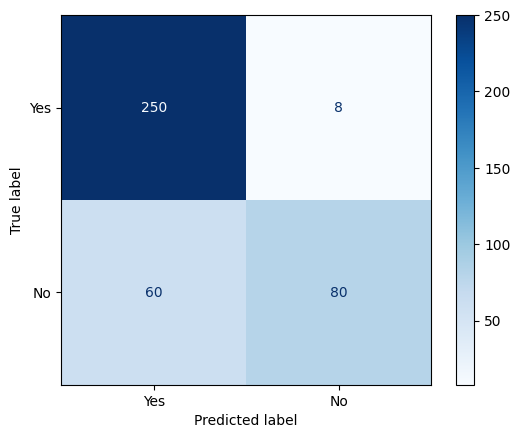

In [161]:
plot_confusion_matrix(knn,X_test,y_test, cmap=plt.cm.Blues)
plt.xticks([0,1],['Yes', 'No'])
plt.yticks([0,1], ['Yes', 'No']);